<a href="https://colab.research.google.com/github/hera1228/DAP/blob/main/%5B2022%5D_Midterm_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Examination - Lab Session
### Data Analysis Programming - 4471017
##### Kangwon National University
##### 28. Oct. 2022.
---
| Problem | Score |
|---------|-------|
| 1       |(&emsp;&emsp;) / 60    |
| 2       |(&emsp;&emsp;) / 40    |
| Total   |(&emsp;&emsp;) / 100    |

---
* This examination contains **two problems**.

* You have **45 minutes** to complete the examination.
       
* Please download `.ipynb` file and submit it on ERUI.

* No need to consider colors.
---

# Load Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1. Marketing

## Load Dataset

In [2]:
# Load marketing data
data = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv',
                   header=2).set_index('customerid').sample(n=500, random_state=0)

# Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Column-wise filtration
selectedAttritbute = ['age',	'salary',	'balance',	'marital',	'targeted',	'job',	'education']
data = data[selectedAttritbute]

data.head()

,age,salary,balance,marital,targeted,job,education
customerid,,,,,,,
14002,37.0,100000,1403,married,yes,management,tertiary
32047,36.0,70000,-253,single,yes,services,secondary
13319,47.0,20000,-406,married,yes,blue-collar,primary
42992,57.0,16000,501,married,yes,housemaid,primary
14238,33.0,20000,-406,married,yes,blue-collar,secondary


## 1-1. Visualization [10 pts]
결혼 여부에 따른 나이의 분포를 KDE plot을 이용하여 나타내시오 (Plot the kernel density estimate (KDE) plot of `age` in condition of `maritial`).
- Use `kdeplot` of Seaborn

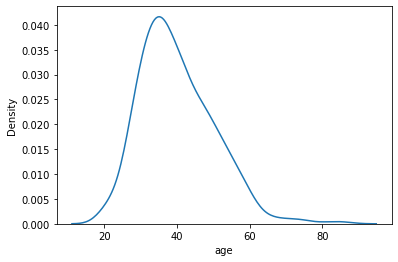

In [42]:
maritial=data.groupby('marital')
ax = sns.kdeplot(data=data, x="age")
plt.show()

## 1-2. Visualization and statistical test. [20 points]
* [10 pts] 아래 완성된 그림을 참조하여 `marital` 상태에 따라 3개의 그룹을 나누어진 여섯 개의 `targeted`과 `balance`의 관계를 나타내고 있는 boxplot을 그리시오. (Referring to the completed figure below, draw a boxplot showing the relationship between six `targeted` and `balance`, divided into three groups according to `marital` status.)
 * **hint**, use `catplot` instead of boxplot
* [10 pts] `targeted`에 따른 `balance`의 차이가 존재하는 지 여부를 **적절한** 통계검정을 통해 p-value를 산출하시오. (Get p-value with proper statistical test whether there is a difference in `balance` according to `targeted`)
 * 옳지 않은 통계검정을 사용할 경우 감점 (if you use wrong statistical test, grade will be deducted)

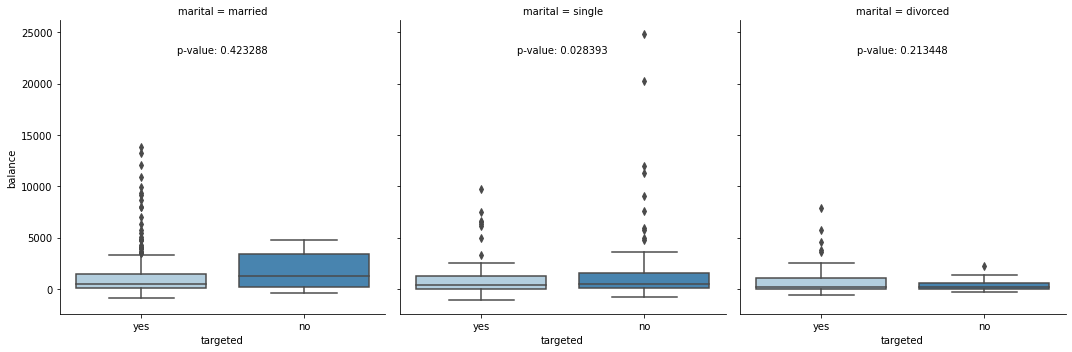

In [ ]:
from scipy.stats import ttest_ind

# 1번 문항
g = ##################################

# 2번 문항
marital = ['married', 'single', 'divorced']
for ma, ax in zip(marital, g.axes[0]):
    yesSalary = ##################################
    noSalary = ##################################
    
    stats, p = ##################################

    ax.text(0.5, 0.9, 'p-value: %f'%p,
          horizontalalignment='center',
          verticalalignment='center',
          transform = ax.transAxes)    

## 1-3 Encoding [10 Points]

* [5 Points] Encode `marital`, `targeted`, `job` attributes using one-hot encoding.


In [54]:
# Encode using one-hot encoding.
dataEncode = pd.get_dummies(data, prefix='None', 
    prefix_sep='_', 
    dummy_na=False, 
    columns=None, 
    sparse=False, 
    drop_first=False, 
    dtype=None)##################################
dataEncode.head()

,age,salary,balance,None_divorced,None_married,None_single,None_no,None_yes,None_admin.,None_blue-collar,...,None_self-employed,None_services,None_student,None_technician,None_unemployed,None_unknown,None_primary,None_secondary,None_tertiary,None_unknown
customerid,,,,,,,,,,,,,,,,,,,,,
14002,37.0,100000,1403,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32047,36.0,70000,-253,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
13319,47.0,20000,-406,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
42992,57.0,16000,501,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14238,33.0,20000,-406,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


* [5 Points] Encode `education` attribute using ordinal encoding with order of (`primary`, `secondary`, `tertiary`).

In [ ]:
# Encode using ordinal encoding
eduMap = dataEncode##################################
dataEncode['education'] = ##################################
dataEncode.head()

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
customerid,,,,,,,,,,,,,,,,,,,,,
14002,37.0,100000,1403,2.0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
32047,36.0,70000,-253,1.0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13319,47.0,20000,-406,0.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
42992,57.0,16000,501,0.0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
14238,33.0,20000,-406,1.0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## 1-4 Scaling [10 Points]
* Apply z-score scaling on `dataEncode`.

In [52]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = ##################################

# fit and transform the data
dataScale = ##################################

dataEncode.head()

,age,salary,balance,None_divorced,None_married,None_single,None_no,None_yes,None_admin.,None_blue-collar,...,None_self-employed,None_services,None_student,None_technician,None_unemployed,None_unknown,None_primary,None_secondary,None_tertiary,None_unknown
customerid,,,,,,,,,,,,,,,,,,,,,
14002,37.0,100000,1403,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
32047,36.0,70000,-253,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
13319,47.0,20000,-406,0,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
42992,57.0,16000,501,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
14238,33.0,20000,-406,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


## 1-5 kNN imputation [10 Points]

In [ ]:
index = dataScale['age'].isna()
dataScale.loc[index, :]

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
387,NaN,2.015861,-0.330905,-0.26561,-0.372763,0.833616,-0.635999,-0.46216,0.46216,-0.340693,...,5.03148,-0.193247,-0.468521,-0.224544,-0.224544,-0.322107,-0.169725,-0.474858,-0.175863,-0.044766


* Apply kNN imputation with *ten* numbers of nearest neighbor on `dataScale`.

In [ ]:
from sklearn.impute import KNNImputer

dataImp = dataScale.copy()
# create a imputer object
imp_knn = ##################################

# fit and transform the data
dataImp[:] = ##################################

In [ ]:
dataImp.loc[index, :]

,age,salary,balance,education,marital_divorced,marital_married,marital_single,targeted_no,targeted_yes,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
387,0.153536,2.015861,-0.330905,-0.26561,-0.372763,0.833616,-0.635999,-0.46216,0.46216,-0.340693,...,5.03148,-0.193247,-0.468521,-0.224544,-0.224544,-0.322107,-0.169725,-0.474858,-0.175863,-0.044766


# Problem 2. Citizen
## Load data
다음은 각 attribute에 대한 설명이다.
* `x`는 해당 시민이 거주하는 x좌표이며, 도시의 위치를 파악할 때 사용합니다.
* `y`는 해당 시민이 거주하는 y좌표이며, 도시의 위치를 파악할 때 사용합니다.
* `city`는 해당 시민이 거주하는 도시의 이름이며, 집단으로 구성되어 있습니다.
* `height`는 해당 시민의 키 입니다.
* `weight`는 해당 시민의 몸무게입니다.
* `eye_color`는 해당 시민의 눈동자 색 입니다.

The following is a description of each attribute.
* `x` is the x-coordinate where the citizen resides, and is used to determine the location of the city.
* `y` is the y-coordinate where the citizen resides, and is used to determine the location of the city.
* `city` is the name of the city in which the citizen resides, and is composed of a group.
* `height` is the height of the citizen.
* `weight` is the citizen's weight.
* `eye_color` is the eye color of the citizen.

In [31]:
df = pd.read_excel('https://github.com/choi-hyunsoo/DAP/blob/main/upload/citizen.xlsx?raw=true', index_col='Unnamed: 0')
df.head()

,x,y,city,height,weight,eye_color
0,12.433361,10.853567,NaN,195.580463,76.604433,rosybrown
1,-19.906737,21.282892,NaN,140.620911,65.084011,cornflowerblue
2,4.420092,-11.505273,Lys,143.682002,70.470843,palegreen
3,-4.671561,-11.124672,Qohor,154.891965,45.426140,rosybrown
4,-1.687657,0.237334,Braavos,154.839435,60.648978,firebrick


## 2-1 Conditioning [20 points]
현재 `city`와 `eye_color`에 NaN인 sample들이 존재한다. Currently, some sample's `city` and `eye_color` are missing (`NaN`).

1. 아래 조건을 만족하는 sample들을 찾아 `city`를 천계의 도시라고 불리는 `Volantis`로 부여하라. Find samples that satisfy the following conditions and assign `city` to `Volantis`.

 * `Volantis` 사람들의 키를 표준 IQR 기법으로 확인 결과, 전체 데이터를 기준으로 보았을 때 **비정상적으로 크다**. As a result of checking the heights of `Volantis` people using standard IQR, it is **anomaly large** against the entire citizen.
 * 비정상의 기준이 되는 `step`은 **1.5 * IQR**로 정의한다. `step`, which is the criterion for anomaly, is defined as **1.5 * IQR**

In [ ]:
##################################
##################################
##################################
condition_volan = ##################################

df.loc[condition_volan, 'city'] = 'Volantis'

2. 아래 조건을 만족하는 sample들을 찾아 `city`를 강인한 용의 후손들이 산다는 `Myr`로 부여하라. Find samples that satisfy the conditions below and assign `city` to `Myr`.

 * `Myr` 사람들의 몸무게는 **모든 시민과 비교했을 때, 몸무게 분포에서 상위 35%를 초과한다**. The weight of the `Myr` people is **over the top 35% of the weight distribution against every data**.
 * 또한 혈통의 영향을 받아 모두 **눈동자 색이 옅은 코랄빛(lightcoral)** 이다. Also, due to the influence of blood, all of them have a `lightcoral` `eye_color`.

In [ ]:
##################################
condition_myr = ##################################

df.loc[condition_myr, 'city'] = 'Myr'

 3.  아름다운 꽃의 도시 `Norvos`는 해가 제일 늦게 지는 곳으로 유명하다. 아래 조건을 만족하는 sample들을 찾아 `city`를 `Myr`로 부여하라. `Norvos`, the city of beautiful flowers, is famous for the place where the sun sets last. Find samples that satisfy the conditions below and assign `city` to `Myr`.
  * **모든 도시를 기준으로, 이 도시의 X좌표는 하위 25%, Y좌표는 상위 25% 이상** 에 속한다. Based on all cities, the **X** coordinate of this city belongs to the **bottom 25%**, and the **Y** coordinate belongs to the **top 25% or more**.
  * 키우는 꽃의 영향을 받은 `Norvos` 시민의 **눈은 모두 꽃과 비슷한 푸른색 (`cornflowerblue`)이거나 장밋빛 (`rosybrown`)** 이다. The eyes of the citizens of `Norvos` affected by the flowers they grow are `cornflowerblue` or `rosybrown`.


In [ ]:
##################################
##################################
condition_norvos = ##################################

df.loc[condition_norvos, 'city'] = 'Norvos'

 4.해가 제일 처음 뜨는 도시 `Lorath` 시민들의 `eye_color`를 아래의 조건을 따라 부여하시오.
   * `Lorath`의 **Y좌표 기준, 상위 50% 이상** 지역에 거주하는 시민의 눈동자 색은 **청보라색 (blueviolet)** 이다.
   * `Lorath`의 **Y좌표 기준, 하위 50%미만** 지역에 거주하는 시민의 눈동자 색은 **모카신색 (moccasin)** 이다.

In [ ]:
##################################
condition_north = ##################################
condition_south = ##################################

df.loc[condition_north, 'eye_color'] = 'moccasin'
df.loc[condition_south, 'eye_color'] = 'blueviolet'

## 2-2 Viusalization [20 points]
모든 시민들의 위치를 `x`, `y` 값을 기준으로 그리세요. 부가적인 조건은 다음과 같습니다. Draw the positions of all citizens based on `x` and `y` values. Additional conditions are as follows.
1. `eye_color` 색과 그래프에서 표현되는 색은 일치해야 합니다. The `eye_color` and the color of points on the graph must match.
2. 도시의 이름은 해당 도시의 x값, y값의 평균에 위치시키시오. 폰트는 주어진 font를 사용하세요. Place the name of the city on the average of the `x` and `y` values ​​of the city. For fonts, use the given font.

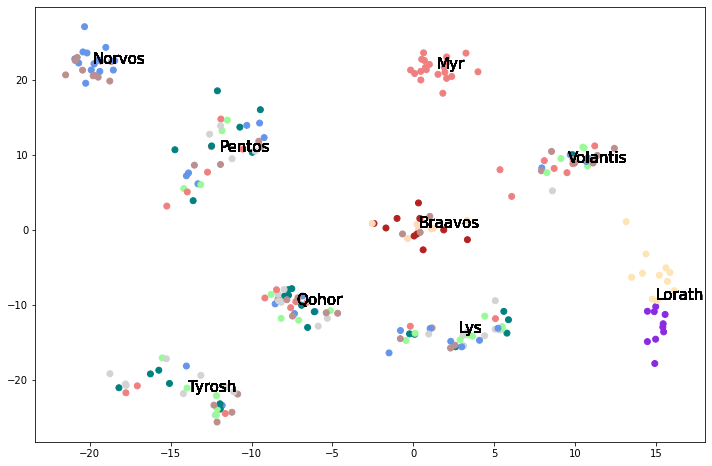

In [ ]:
fig, ax = plt.subplots(figsize = (12, 8))
##################################

# Add text
font = {'family': 'Dejavu Sans', 'size': 15}
for i in df['city'].values:
    ##################################
    ##################################
    plt.text(##################################)    
plt.show()